In [2]:
# prophet 알고리즘 이용한 단일 시계열 예측 구현안
# 특징 : holiday 옵션 이용한 특정 이벤트날(부동산 정책 발표일)을 포함한 예측안

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
idt = pd.read_csv("./DATA/aptaprice.csv")
jdt = pd.read_csv("./DATA/apta_jsprice.csv")

sdt = pd.read_csv("./DATA/aptsum_seoul.csv")
gdt = pd.read_csv("./DATA/aptsum_gg.csv")

In [4]:
idt = idt.drop([0])
jdt = jdt.drop([0])

In [5]:
idt["date"] = pd.to_numeric(idt["date"])
jdt["date"] = pd.to_numeric(jdt["date"])
sdt["date"] = pd.to_numeric(sdt["date"])
gdt["date"] = pd.to_numeric(gdt["date"])

In [6]:
# idt.index = idt["date"]
# jdt.index = jdt["date"]

In [7]:
sdt = sdt.drop(["Unnamed: 0"], axis = 1)
# sdt.index = sdt["date"]

In [8]:
gdt = gdt.drop(["Unnamed: 0"], axis = 1)
# gdt.index = gdt["date"]

In [9]:
jdt = jdt.rename(columns={'apt_sum':'js_price'})

In [10]:
idt

,date,apt_sum
1,19970115,1.306520e+10
2,19970215,1.322423e+10
3,19970315,1.335122e+10
4,19970415,1.344120e+10
5,19970515,1.359595e+10
...,...,...
1069,20190823,3.049338e+11
1070,20190830,3.051046e+11
1071,20190906,3.052011e+11
1072,20190920,3.060269e+11


In [11]:
jdt

,date,js_price
1,19970115,6.522966e+09
2,19970215,6.579288e+09
3,19970315,6.643742e+09
4,19970415,6.673002e+09
5,19970515,6.719561e+09
...,...,...
1069,20190823,1.926593e+11
1070,20190830,1.927292e+11
1071,20190906,1.927708e+11
1072,20190920,1.928744e+11


In [12]:
dt1 = pd.merge(idt, jdt)
dt1.head()

,date,apt_sum,js_price
0,19970115,1.306520e+10,6.522966e+09
1,19970215,1.322423e+10,6.579288e+09
2,19970315,1.335122e+10,6.643742e+09
3,19970415,1.344120e+10,6.673002e+09
4,19970515,1.359595e+10,6.719561e+09


In [13]:
dt2 = pd.merge(dt1,sdt)
dt2.head()

,date,apt_sum,js_price,apt_sum_seoul
0,19970115,1.306520e+10,6.522966e+09,6.843884e+09
1,19970215,1.322423e+10,6.579288e+09,6.910998e+09
2,19970315,1.335122e+10,6.643742e+09,6.921145e+09
3,19970415,1.344120e+10,6.673002e+09,6.978939e+09
4,19970515,1.359595e+10,6.719561e+09,7.105578e+09


In [14]:
dt3 = pd.merge(dt2,gdt)
dt3.head()

,date,apt_sum,js_price,apt_sum_seoul,apt_sum_gg
0,19970115,1.306520e+10,6.522966e+09,6.843884e+09,4.413718e+09
1,19970215,1.322423e+10,6.579288e+09,6.910998e+09,4.486885e+09
2,19970315,1.335122e+10,6.643742e+09,6.921145e+09,4.545453e+09
3,19970415,1.344120e+10,6.673002e+09,6.978939e+09,4.567198e+09
4,19970515,1.359595e+10,6.719561e+09,7.105578e+09,4.581848e+09


In [15]:
dt3.tail()

,date,apt_sum,js_price,apt_sum_seoul,apt_sum_gg
1068,20190823,3.049338e+11,1.926593e+11,1.147008e+11,8.644733e+10
1069,20190830,3.051046e+11,1.927292e+11,1.148124e+11,8.646686e+10
1070,20190906,3.052011e+11,1.927708e+11,1.149041e+11,8.649957e+10
1071,20190920,3.060269e+11,1.928744e+11,1.157184e+11,8.652302e+10
1072,20190927,3.064525e+11,1.930504e+11,1.158513e+11,8.654101e+10


In [16]:
dt3.index = idt["date"]

In [17]:
# dt3 = dt3.drop("date", axis = 1)

In [18]:
# idt = idt.drop("date", axis = 1)
# jdt = jdt.drop("date", axis = 1)
# sdt = sdt.drop(["date"], axis = 1)
# gdt = gdt.drop(["date"], axis = 1)

In [19]:
pd.set_option('max_colwidth', 10000)
pd.options.display.float_format = '{:.4f}'.format

date
19970115    13065196400.0000
19970215    13224225805.0000
19970315    13351217515.0000
19970415    13441199380.0000
19970515    13595946725.0000
                  ...       
20190823   304933792321.5000
20190830   305104600846.5000
20190906   305201068246.5000
20190920   306026904221.5000
20190927   306452547391.5000
Name: apt_sum, Length: 1073, dtype: float64

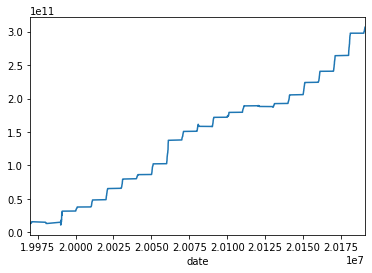

In [20]:
dt3["apt_sum"].plot()
dt3["apt_sum"]

In [21]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 19970115 to 20190927
Data columns (total 5 columns):
date             1073 non-null int64
apt_sum          1073 non-null float64
js_price         1073 non-null float64
apt_sum_seoul    1073 non-null float64
apt_sum_gg       1073 non-null float64
dtypes: float64(4), int64(1)
memory usage: 50.3 KB


In [22]:
# prophet 예측 구현
from fbprophet import Prophet
import pandas as pd

In [23]:
dt3.head()

,date,apt_sum,js_price,apt_sum_seoul,apt_sum_gg
date,,,,,
19970115,19970115,13065196400.0000,6522966235.0000,6843884275.0000,4413718415.0000
19970215,19970215,13224225805.0000,6579288085.0000,6910997625.0000,4486885140.0000
19970315,19970315,13351217515.0000,6643742460.0000,6921145025.0000,4545453470.0000
19970415,19970415,13441199380.0000,6673001760.0000,6978938775.0000,4567197870.0000
19970515,19970515,13595946725.0000,6719560750.0000,7105578475.0000,4581848020.0000


In [24]:
pr_dt = dt3["apt_sum"]
pr_dt = pr_dt.reset_index()
pr_dt.head()

,date,apt_sum
0,19970115,13065196400.0000
1,19970215,13224225805.0000
2,19970315,13351217515.0000
3,19970415,13441199380.0000
4,19970515,13595946725.0000


In [25]:
pr_dt["date1"] = pr_dt["date"].astype(str).str[:4] + "-" + pr_dt["date"].astype(str).str[4:6] + "-" + pr_dt["date"].astype(str).str[6:8]

In [26]:
pr_dt = pr_dt.rename(columns = {"date1":"ds", "apt_sum":"y"})
pr_dt = pr_dt.drop(columns=["date"],axis=1)
pr_dt.head()

,y,ds
0,13065196400.0000,1997-01-15
1,13224225805.0000,1997-02-15
2,13351217515.0000,1997-03-15
3,13441199380.0000,1997-04-15
4,13595946725.0000,1997-05-15


In [27]:
pr_dt.tail()

,y,ds
1068,304933792321.5000,2019-08-23
1069,305104600846.5000,2019-08-30
1070,305201068246.5000,2019-09-06
1071,306026904221.5000,2019-09-20
1072,306452547391.5000,2019-09-27


In [28]:
pr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 2 columns):
y     1073 non-null float64
ds    1073 non-null object
dtypes: float64(1), object(1)
memory usage: 16.9+ KB


In [191]:
# import pandas as pd
# holiday
# 2017~ 2018  : https://blog.naver.com/eunasol/221561240390

holidays = pd.DataFrame({
    'holiday': 'policy',
    'ds': pd.to_datetime(['2017-06-19', '2017-08-02','2017-10-24','2017-11-29','2017-12-13',
                         '2018-07-05','2018-07-27','2018-09-13']),
                        'lower_window': -4,
                        'upper_window': 158,})

# superbowls = pd.DataFrame({
#     'holiday': 'superbowl',
#     'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
#     'lower_window': 0,
#     'upper_window': 1,
#   })
# holidays = pd.concat((playoffs, superbowls))

In [192]:
m = Prophet(holidays = holidays)
m.fit(pr_dt)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [193]:
future = m.make_future_dataframe(periods = 4, freq='W')

In [194]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1072,2019-09-27,306112184990.7426,304599155796.6428,309123245490.7753,306112184990.7426,306112184990.7426,889873360.8762,889873360.8762,889873360.8762,0.0000,...,544798599.4213,544798599.4213,544798599.4213,345074761.4548,345074761.4548,345074761.4548,0.0000,0.0000,0.0000,307002058351.6187
1073,2019-09-29,306236413490.8093,304105426237.4992,308584981089.6469,306236413490.8093,306236413490.8093,80587024.2446,80587024.2446,80587024.2446,0.0000,...,-262592580.4844,-262592580.4844,-262592580.4844,343179604.7290,343179604.7290,343179604.7290,0.0000,0.0000,0.0000,306317000515.0539
1074,2019-10-06,306671213241.0425,304408562807.3867,308902593939.5831,306671213241.0425,306671213241.0425,78749196.8731,78749196.8731,78749196.8731,0.0000,...,-262592580.4852,-262592580.4852,-262592580.4852,341341777.3583,341341777.3583,341341777.3583,0.0000,0.0000,0.0000,306749962437.9156
1075,2019-10-13,307106012991.2759,305000166484.0806,309582567353.2222,307106012991.2759,307106012991.2759,80290304.3094,80290304.3094,80290304.3094,0.0000,...,-262592580.4860,-262592580.4860,-262592580.4860,342882884.7954,342882884.7954,342882884.7954,0.0000,0.0000,0.0000,307186303295.5854
1076,2019-10-20,307540812741.5093,305230552547.8620,309918409837.5786,307540812741.5093,307540812741.5093,78714498.3914,78714498.3914,78714498.3914,0.0000,...,-262592580.4832,-262592580.4832,-262592580.4832,341307078.8746,341307078.8746,341307078.8746,0.0000,0.0000,0.0000,307619527239.9007


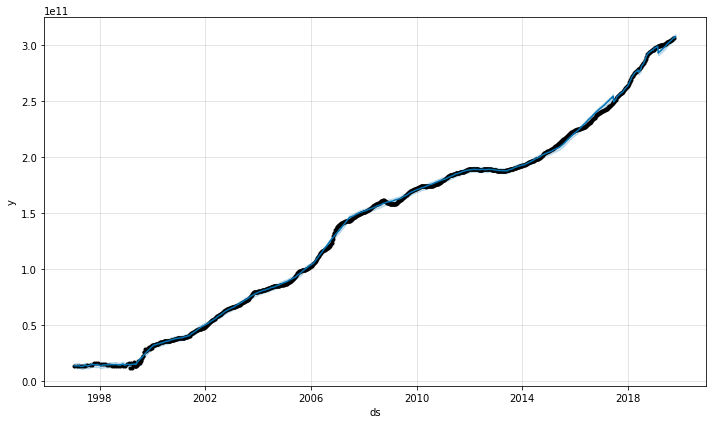

In [195]:
fig1 = m.plot(forecast)

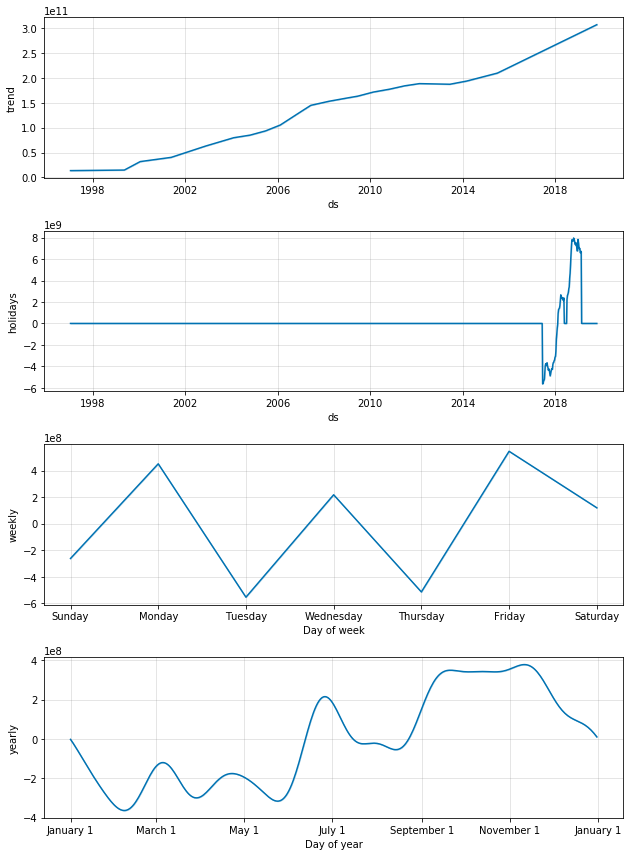

In [196]:
fig2 = m.plot_components(forecast)

In [197]:
# test실제 값 가져오기
test = pd.read_csv("apt_predict.csv", index_col=0)
test = test["apt_sum"]
test.head()

0   306808956516.0000
1   306926575166.0000
2   307048222416.0000
3   307193025066.0000
Name: apt_sum, dtype: float64

In [198]:
forecast.yhat[-4:]

1073   306317000515.0539
1074   306749962437.9156
1075   307186303295.5854
1076   307619527239.9007
Name: yhat, dtype: float64

In [199]:
forecast.yhat[-4:].sum() - test.sum()

-103985675.5444336